## Predict heart disease rate by county in the US: Regression

The goal is to predict the rate of heart disease (per 100,000 individuals) across the United States at the county-level from other socioeconomic indicators. Data was scraped from the USDA ERS website.

The target column is labeled `heart_disease_mortality_per_100k` which is in the 'Training_labels.csv' file.

For more reference, you can access the original kaggle dataset here: [Microsoft Data Science Capstone](https://www.kaggle.com/nandvard/microsoft-data-science-capstone).

---

In [1]:
# Import neccessary packages for data wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

# show all columns
pd.set_option('display.max_column', None)

C:\Users\samdo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Check out all the files used for this project
for file in os.listdir('../Data/predict heart disease rate'):
    print(file)

DataWrangling_output.csv
Test_values.csv
Training_labels.csv
Training_values.csv


### <font color='teal'> For this project, we will only be using the two 'Training_xxx' files.

We will not be using the 'Test_values.csv' file because it does not have any target values associated with it. This dataset was originally meant for a kaggle competition, where the 'Test_values.csv' file would generate a prediction file used for the competition.

In [3]:
# Load the training dataset
df = pd.read_csv('../Data/predict heart disease rate/Training_values.csv')
df.head(2)

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.23,0.131,0.089,NaN,0.332,13.0,2.8,15.09,1650.0,1489.0,a
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.19,0.090,0.082,0.181,0.265,10.0,2.3,19.79,2010.0,2480.0,a


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   row_id                                            3198 non-null   int64  
 1   area__rucc                                        3198 non-null   object 
 2   area__urban_influence                             3198 non-null   object 
 3   econ__economic_typology                           3198 non-null   object 
 4   econ__pct_civilian_labor                          3198 non-null   float64
 5   econ__pct_unemployment                            3198 non-null   float64
 6   econ__pct_uninsured_adults                        3196 non-null   float64
 7   econ__pct_uninsured_children                      3196 non-null   float64
 8   demo__pct_female                                  3196 non-null   float64
 9   demo__pct_below_18_

In [5]:
df.describe()

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician
count,3198.000000,3198.000000,3198.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3196.000000,2734.000000,3196.000000,3016.000000,2220.000000,3196.000000,3170.000000,1231.000000,2781.000000,2954.000000,2968.000000
mean,3116.985616,0.467191,0.059696,0.217463,0.086067,0.498811,0.227715,0.170043,0.090207,0.091046,0.769989,0.024680,0.013109,0.148815,0.350567,0.301143,0.199475,11.676986,10.301126,0.307668,0.213628,0.109260,0.083896,0.164841,0.277161,11.625868,5.947498,21.132618,3431.433649,2551.339286
std,1830.236781,0.074400,0.022947,0.067362,0.039849,0.024399,0.034282,0.043694,0.142763,0.147165,0.207850,0.084563,0.025431,0.068208,0.070554,0.052318,0.089308,2.739516,2.786143,0.043228,0.062895,0.023216,0.022251,0.050474,0.053003,1.557996,5.031822,10.485923,2569.450603,2100.459467
min,0.000000,0.207000,0.010000,0.046000,0.012000,0.278000,0.092000,0.045000,0.000000,0.000000,0.053000,0.000000,0.000000,0.015075,0.065327,0.109548,0.011078,4.000000,0.000000,0.131000,0.046000,0.032000,0.033000,0.038000,0.090000,7.000000,-0.400000,3.140000,339.000000,189.000000
25%,1504.250000,0.420000,0.044000,0.166000,0.057000,0.493000,0.206000,0.141000,0.019000,0.006000,0.649000,0.002000,0.002000,0.096588,0.305357,0.264861,0.139234,10.000000,8.000000,0.284000,0.172000,0.094000,0.069000,0.130000,0.242750,10.000000,2.620000,13.490000,1812.250000,1420.000000
50%,3113.500000,0.468000,0.057000,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,0.853000,0.007000,0.007000,0.133234,0.355015,0.301587,0.176471,11.000000,10.000000,0.309000,0.210000,0.109000,0.081000,0.164000,0.280000,12.000000,4.700000,19.630000,2690.000000,1999.000000
75%,4724.750000,0.514000,0.072000,0.261000,0.106000,0.512000,0.246000,0.195000,0.087000,0.096000,0.936250,0.014000,0.013000,0.194796,0.399554,0.336590,0.231354,13.000000,12.000000,0.334000,0.249000,0.124000,0.095000,0.197000,0.313000,13.000000,7.890000,26.490000,4089.750000,2859.000000
max,6276.000000,1.000000,0.248000,0.496000,0.281000,0.573000,0.417000,0.346000,0.932000,0.858000,0.990000,0.859000,0.341000,0.473526,0.558912,0.473953,0.798995,29.000000,27.000000,0.471000,0.513000,0.203000,0.238000,0.367000,0.442000,15.000000,50.490000,110.450000,28130.000000,23399.000000


---
#### <font color='teal'> Since our target column is not in this CSV file, we will add it to our dataframe using the `Training_labels.csv` file

In [6]:
target_vals = pd.read_csv('../Data/predict heart disease rate/Training_labels.csv')
target_vals.head()

,row_id,heart_disease_mortality_per_100k
0,0,312
1,1,257
2,4,195
3,5,218
4,6,355


In [7]:
# merge dataframes using the 'row_id' column to merge on 'row_id'
df = pd.merge(df, target_vals, on='row_id')
df.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,NaN,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,218
4,6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355


In [8]:
# Print the shape of df
df.shape

(3198, 35)

### <font color='teal'> Reviewing the columns

#### <font color='teal'> Column descriptions
    
| Column | Description |
| --- | --- |
| **area__** | **information about the county** |
| area__rucc | Rural-Urban Continuum Codes "form a classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area. The official Office of Management and Budget (OMB) metro and nonmetro categories have been subdivided into three metro and six nonmetro categories. Each county in the U.S. is assigned one of the 9 codes." (USDA Economic Research Service, https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/) |
| area_urbaninfluence | Urban Influence Codes "form a classification scheme that distinguishes metropolitan counties by population size of their metro area, and nonmetropolitan counties by size of the largest city or town and proximity to metro and micropolitan areas." (USDA Economic Research Service, https://www.ers.usda.gov/data-products/urban-influence-codes/) |
| **econ__** | **economic indicators** |
| econ_economictypology | County Typology Codes "classify all U.S. counties according to six mutually exclusive categories of economic dependence and six overlapping categories of policy-relevant themes. The economic dependence types include farming, mining, manufacturing, Federal/State government, recreation, and nonspecialized counties. The policy-relevant types include low education, low employment, persistent poverty, persistent child poverty, population loss, and retirement destination." (USDA Economic Research Service, https://www.ers.usda.gov/data-products/county-typology-codes.aspx) |
| econ_pctcivilian_labor | Civilian labor force, annual average, as percent of population (Bureau of Labor Statistics, http://www.bls.gov/lau/) |
| econ_pctunemployment | Unemployment, annual average, as percent of population (Bureau of Labor Statistics, http://www.bls.gov/lau/) |
| econpctuninsuredadults | Percent of adults without health insurance (Bureau of Labor Statistics, http://www.bls.gov/lau/)|
| econpctuninsuredchildren | Percent of children without health insurance (Bureau of Labor Statistics, http://www.bls.gov/lau/) |
| **health__** | **health indicators** |
| health_pctadult_obesity | Percent of adults who meet clinical definition of obese (National Center for Chronic Disease Prevention and Health Promotion) |
| health_pctadult_smoking | Percent of adults who smoke (Behavioral Risk Factor Surveillance System) |
| health_pctdiabetes | Percent of population with diabetes (National Center for Chronic Disease Prevention and Health Promotion, Division of Diabetes Translation) |
| health_pctlow_birthweight | Percent of babies born with low birth weight (National Center for Health Statistics) |
| health_pctexcessive_drinking | Percent of adult population that engages in excessive consumption of alcohol (Behavioral Risk Factor Surveillance System, ) |
| health_pctphysical_inacticity | Percent of adult population that is physically inactive (National Center for Chronic Disease Prevention and Health Promotion) |
| health_airpollutionparticulatematter | Fine particulate matter in µg/m³ (CDC WONDER, https://wonder.cdc.gov/wonder/help/pm.html) |
| health_homicidesper_100k | Deaths by homicide per 100,000 population (National Center for Health Statistics) |
| health_motorvehiclecrashdeathsper100k | Deaths by motor vehicle crash per 100,000 population (National Center for Health Statistics) |
| health_popper_dentist | Population per dentist (HRSA Area Resource File) |
| health_popperprimarycare_physician | Population per Primary Care Physician (HRSA Area Resource File) |
| **demo__** | **demographics information** |
| demo_pctfemale | Percent of population that is female (US Census Population Estimates) |
| demo_pctbelow18yearsofage | Percent of population that is below 18 years of age (US Census Population Estimates) |
| demo_pctaged65yearsandolder | Percent of population that is aged 65 years or older (US Census Population Estimates) |
| demo_pcthispanic | Percent of population that identifies as Hispanic (US Census Population Estimates) |
| demo_pctnonhispanicafrican_american | Percent of population that identifies as African American (US Census Population Estimates) |
| demo_pctnonhispanicwhite | Percent of population that identifies as Hispanic and White (US Census Population Estimates) |
| demo_pctamericanindianoralaskannative | Percent of population that identifies as Native American (US Census Population Estimates) |
| demo_pctasian | Percent of population that identifies as Asian (US Census Population Estimates) |
| demo_pctadultslessthanahighschooldiploma | Percent of adult population that does not have a high school diploma (US Census, American Community Survey) |
| demo_pctadultswithhighschooldiploma | Percent of adult population which has a high school diploma as highest level of education achieved (US Census, American Community Survey) |
| demo_pctadultswithsome_college | Percent of adult population which has some college as highest level of education achieved (US Census, American Community Survey) |
| demo_pctadultsbachelorsor_higher | Percent of adult population which has a bachelor's degree or higher as highest level of education achieved (US Census, American Community Survey) |
| demo_birthrateper1k | Births per 1,000 of population (US Census Population Estimates) |
| demo_deathrateper1k | Deaths per 1,000 of population (US Census Population Estimates) |

In [9]:
# group data for column names, datatype, and null values and percent for each column
dtypes = pd.DataFrame(df.dtypes.values, columns=['dtype'])
dcolumns = pd.DataFrame(df.columns, columns=['Column Name'])
dnull = pd.DataFrame(df.isnull().sum().values, columns=['NaN count'])
dnullpct = pd.DataFrame(data=(100 * (df.isnull().sum() / len(df))).values, columns=['Percent NaN'])

# print column names with associated datatype and percent of null values
df_defs = pd.concat([dcolumns, dtypes, dnull, dnullpct], axis=1)
df_defs

,Column Name,dtype,NaN count,Percent NaN
0,row_id,int64,0,0.000000
1,area__rucc,object,0,0.000000
2,area__urban_influence,object,0,0.000000
3,econ__economic_typology,object,0,0.000000
4,econ__pct_civilian_labor,float64,0,0.000000
5,econ__pct_unemployment,float64,0,0.000000
6,econ__pct_uninsured_adults,float64,2,0.062539
7,econ__pct_uninsured_children,float64,2,0.062539
8,demo__pct_female,float64,2,0.062539
9,demo__pct_below_18_years_of_age,float64,2,0.062539


In [10]:
# Create a dictionary with the categorical columns and the number of unique values
df_cat = {col:df[col].nunique() for col in df.columns if df[col].dtype == 'O'}
df_cat

{'area__rucc': 9,
 'area__urban_influence': 12,
 'econ__economic_typology': 6,
 'yr': 2}

## <font color='teal'> Data Cleaning
    
Handling the missing values

In [11]:
# again review the columns with missing values
df_defs[df_defs['Percent NaN'] > 0]

,Column Name,dtype,NaN count,Percent NaN
6,econ__pct_uninsured_adults,float64,2,0.062539
7,econ__pct_uninsured_children,float64,2,0.062539
8,demo__pct_female,float64,2,0.062539
9,demo__pct_below_18_years_of_age,float64,2,0.062539
10,demo__pct_aged_65_years_and_older,float64,2,0.062539
11,demo__pct_hispanic,float64,2,0.062539
12,demo__pct_non_hispanic_african_american,float64,2,0.062539
13,demo__pct_non_hispanic_white,float64,2,0.062539
14,demo__pct_american_indian_or_alaskan_native,float64,2,0.062539
15,demo__pct_asian,float64,2,0.062539


#### <font color='teal'> It seems that there are many columns that only have 2 values missing, we will ignore them for now. Let's start by looking at the column with the most missing data: `health__homicides_per_100k`

In [12]:
df['health__homicides_per_100k'].describe()

count    1231.000000
mean        5.947498
std         5.031822
min        -0.400000
25%         2.620000
50%         4.700000
75%         7.890000
max        50.490000
Name: health__homicides_per_100k, dtype: float64

<font color='teal'> This column contains more that 61% missing values, and does not indicate that NaN values would be 0 percent, therefore we will drop the column.

In [13]:
# drop the 'health__homicides_per_100k' column
df.drop('health__homicides_per_100k', axis=1, inplace=True)

<font color='teal'> Let's look at all the columns with less than 10% of missing values.
    
We will create a table that can be used to get the average value for each column based on 3 categorical columns

In [14]:
# Create a table that produces the mean values for each column based on:
# 'area__rucc', 'area__urban_influence', and 'econ_economic_typology'
mean_table = df.groupby(['area__rucc', 'area__urban_influence', 'econ__economic_typology']).mean()

In [15]:
mean_table

row_id  \
area__rucc                                         area__urban_influence                              econ__economic_typology                           
Metro - Counties in metro areas of 1 million po... Large-in a metro area with at least 1 million r... Farm-dependent                      4034.000000   
                                                                                                      Federal/State government-dependent  3266.947368   
                                                                                                      Manufacturing-dependent             3241.891304   
                                                                                                      Mining-dependent                    3296.583333   
                                                                                                      Nonspecialized                      3184.530822   
...                                                                                                                                               ...   
Nonmetro - Urban population of 20,000 or more, ... Micropolitan not adjacent to a metro area          Federal/State government-dependent  2435.200000   
                                                                                                      Manufacturing-dependent             3588.100000   
                                                                                                      Mining-dependent                    4165.250000   
                                                                                                      Nonspecialized                      2971.340909   
                                                                                                      Recreation                          2178.800000   

                                                                                                                                          econ__pct_civilian_labor  \
area__rucc                                         area__urban_influence                              econ__economic_typology                                        
Metro - Counties in metro areas of 1 million po... Large-in a metro area with at least 1 million r... Farm-dependent                                      0.473500   
                                                                                                      Federal/State government-dependent                  0.475421   
                                                                                                      Manufacturing-dependent                             0.496978   
                                                                                                      Mining-dependent                                    0.480333   
                                                                                                      Nonspecialized                                      0.498267   
...                                                                                                                                                            ...   
Nonmetro - Urban population of 20,000 or more, ... Micropolitan not adjacent to a metro area          Federal/State government-dependent                  0.430550   
                                                                                                      Manufacturing-dependent                             0.500300   
                                                                                                      Mining-dependent                                    0.484250   
                                                                                                      Nonspecialized                                      0.436795   
                                                                                                      Recreation                                          0.49600

In [16]:
# Create a function to be used in the .apply() method to retrieve mean values for missing data
def fillna_vals(val, table, columns=[], id_col=None):
    
    '''
    This function will fill NaN values with the given inputs:
    val - Target column for filling NaN values
    table - Table that will be used for indexing from and retrieving a value
    columns - Default is an empty list. Create a list of which columns are used to index from the given table argument.
    id_col - Default is None. Used to identify a column from a table that has multiple target columns with values.
    '''
    
    if id_col == None:
        if pd.isnull(val):
            # check to see if there is a null/None value in the list; we will ignore these and return a NaN value
            if None in columns:
                return np.nan
            else:
                return float(table.xs(columns))
        else:
            return val
    else:
        if pd.isnull(val):
            if None in columns:
                return pd.isnull()
            else:
                return float(table.xs(columns)[id_col])
        else:
            return val

In [17]:
# Create a df with columns that are less than 10% missing values (ignoring columns with only 2 missing values!)
df_10pct = df_defs[(df_defs['Percent NaN'] > 0) & (df_defs['Percent NaN'] <= 10) & (df_defs['NaN count'] != 2)]
df_10pct

,Column Name,dtype,NaN count,Percent NaN
25,health__pct_low_birthweight,float64,182,5.691057
28,health__air_pollution_particulate_matter,float64,28,0.875547
31,health__pop_per_dentist,float64,244,7.629769
32,health__pop_per_primary_care_physician,float64,230,7.191995


In [18]:
for col in df_10pct['Column Name']:
    df[col] = df.apply(lambda x: fillna_vals(x[col], mean_table, columns=[x['area__rucc'], x['area__urban_influence'],
                                                                          x['econ__economic_typology']], id_col=col), axis=1)

In [19]:
df.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,NaN,0.332,13.0,15.09,1650.0,1489.0,a,312
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181,0.265,10.0,19.79,2010.0,2480.0,a,257
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195,0.209,10.0,3.14,629.0,690.0,b,195
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,NaN,0.104,0.058,NaN,0.238,13.0,NaN,1810.0,6630.0,b,218
4,6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194,0.290,9.0,29.39,3489.0,2590.0,a,355


In [20]:
# Check the null count for all the columns in df
df.isnull().sum()

row_id                                                0
area__rucc                                            0
area__urban_influence                                 0
econ__economic_typology                               0
econ__pct_civilian_labor                              0
econ__pct_unemployment                                0
econ__pct_uninsured_adults                            2
econ__pct_uninsured_children                          2
demo__pct_female                                      2
demo__pct_below_18_years_of_age                       2
demo__pct_aged_65_years_and_older                     2
demo__pct_hispanic                                    2
demo__pct_non_hispanic_african_american               2
demo__pct_non_hispanic_white                          2
demo__pct_american_indian_or_alaskan_native           2
demo__pct_asian                                       2
demo__pct_adults_less_than_a_high_school_diploma      0
demo__pct_adults_with_high_school_diploma       

<font color='teal'> Now lets look at the remaining columns with more than 10% missing values

In [21]:
df_GT10pct = df_defs[(df_defs['Percent NaN'] > 10) & (df_defs['Percent NaN'] < 60)]
df_GT10pct

,Column Name,dtype,NaN count,Percent NaN
23,health__pct_adult_smoking,float64,464,14.509068
26,health__pct_excessive_drinking,float64,978,30.581614
30,health__motor_vehicle_crash_deaths_per_100k,float64,417,13.039400


<font color='teal'> Let's review the 'health__pct_excessive_drinking' column

In [22]:
df['health__pct_excessive_drinking'].describe()

count    2220.000000
mean        0.164841
std         0.050474
min         0.038000
25%         0.130000
50%         0.164000
75%         0.197000
max         0.367000
Name: health__pct_excessive_drinking, dtype: float64

In [23]:
# determine which columns are most correlated to this column
df.corr()['health__pct_excessive_drinking'].sort_values()[:-1]

demo__pct_adults_less_than_a_high_school_diploma   -0.412436
health__pct_diabetes                               -0.384207
heart_disease_mortality_per_100k                   -0.382172
health__pct_low_birthweight                        -0.378372
econ__pct_uninsured_adults                         -0.340959
health__pct_physical_inacticity                    -0.337469
demo__pct_non_hispanic_african_american            -0.284243
health__pct_adult_obesity                          -0.235439
demo__pct_female                                   -0.215347
econ__pct_unemployment                             -0.214149
health__air_pollution_particulate_matter           -0.195515
health__motor_vehicle_crash_deaths_per_100k        -0.175239
demo__death_rate_per_1k                            -0.149701
demo__pct_below_18_years_of_age                    -0.125961
health__pop_per_dentist                            -0.114424
demo__birth_rate_per_1k                            -0.108256
health__pct_adult_smokin

<font color='teal'> Looking at the correlating columns, it looks like `econ__pct_civilian_labor` is most positively correlated, and `demo__pct_adults_less_than_a_high_school_diploma` is most negatively correlated.
    
**We will use these columns to fill NaN values with reasonably correlated mean values.**

In [24]:
# Review the .describe() method for the two correlated columns to determine how to chunk the data into categorical columns
# example: 0-5%, 5-10%, etc...
df[['econ__pct_civilian_labor', 'demo__pct_adults_less_than_a_high_school_diploma']].describe()

,econ__pct_civilian_labor,demo__pct_adults_less_than_a_high_school_diploma
count,3198.000000,3198.000000
mean,0.467191,0.148815
std,0.074400,0.068208
min,0.207000,0.015075
25%,0.420000,0.096588
50%,0.468000,0.133234
75%,0.514000,0.194796
max,1.000000,0.473526


<font color='teal'> Based on the information above, the columns above will be used to create 2 new categorical columns split up by the following:
    
| Column | range, mean, std | Chunk categories (%) |
| --- | --- | --- |
| econ__pct_civilian_labor | 0.207-1.000, 0.467, 0.074 | 20-30, 30-40, 40-45, 45-50, 50-55, 55-60, 60-80, 80-100 |
| demo__pct_adults_less_than_a_high_school_diploma | 0.015-0.474, 0.149, 0.068 | 0-5, 5-10, 10-15, 15-20, 20-30, 30-40, 40-50 |

In [25]:
# Create the functions that will generate the new columns based on chunk size
def chunk_econ_pcl(val):
    if val > 0.20 and val <= 0.30:
        return '20-30'
    elif val > 0.30 and val <= 0.40:
        return '30-40'
    elif val > 0.40 and val <= 0.45:
        return '40-45'
    elif val > 0.45 and val <= 0.50:
        return '45-50'
    elif val > 0.50 and val <= 0.55:
        return '50-55'
    elif val > 0.55 and val <= 0.60:
        return '55-60'
    elif val > 0.60 and val <= 0.80:
        return '60-80'
    elif val > 0.80 and val <= 1.00:
        return '80-100'
    
def chunk_demo_hs_diplo(val):
    if val > 0.00 and val <= 0.05:
        return '0-5'
    elif val > 0.05 and val <= 0.10:
        return '5-10'
    elif val > 0.10 and val <= 0.15:
        return '10-15'
    elif val > 0.15 and val <= 0.20:
        return '15-20'
    elif val > 0.20 and val <= 0.30:
        return '20-30'
    elif val > 0.30 and val <= 0.40:
        return '30-40'
    elif val > 0.40 and val <= 0.50:
        return '40-50'

In [26]:
# create the dataframe that will be used for filtering the data
df_drink = df[['health__pct_excessive_drinking','econ__pct_civilian_labor', 'demo__pct_adults_less_than_a_high_school_diploma']]

# use the .apply() method to create new columns based on the previously created functions
df_drink['econ__pct_civlab_cat'] = df_drink['econ__pct_civilian_labor'].apply(chunk_econ_pcl)
df_drink['demo__pct_less_hs_diplo_cat'] = df_drink['demo__pct_adults_less_than_a_high_school_diploma'].apply(chunk_demo_hs_diplo)
df_drink.isnull().sum()

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


health__pct_excessive_drinking                      978
econ__pct_civilian_labor                              0
demo__pct_adults_less_than_a_high_school_diploma      0
econ__pct_civlab_cat                                  0
demo__pct_less_hs_diplo_cat                           0
dtype: int64

In [27]:
# view the head of the new df df_drink
df_drink.head()

,health__pct_excessive_drinking,econ__pct_civilian_labor,demo__pct_adults_less_than_a_high_school_diploma,econ__pct_civlab_cat,demo__pct_less_hs_diplo_cat
0,NaN,0.408,0.194223,40-45,15-20
1,0.181,0.556,0.164134,55-60,15-20
2,0.195,0.541,0.158573,50-55,15-20
3,NaN,0.500,0.181637,45-50,15-20
4,0.194,0.471,0.122367,45-50,10-15


In [28]:
# Lets create the new table that will be used to filter the mean values by the correlated features
df_drink_table = df_drink.drop(['econ__pct_civilian_labor','demo__pct_adults_less_than_a_high_school_diploma'],
                               axis=1).groupby(['econ__pct_civlab_cat','demo__pct_less_hs_diplo_cat']).mean()

In [29]:
df_drink_table

health__pct_excessive_drinking
econ__pct_civlab_cat demo__pct_less_hs_diplo_cat                                
20-30                10-15                                              0.218000
                     15-20                                                   NaN
                     20-30                                              0.121091
                     30-40                                              0.097000
                     5-10                                               0.221000
30-40                0-5                                                0.161000
                     10-15                                              0.173955
                     15-20                                              0.133433
                     20-30                                              0.116432
                     30-40                                              0.134875
                     40-50                                                   NaN
                     5-10                                               0.162211
40-45                0-5                                                     NaN
                     10-15                                              0.170130
                     15-20                                              0.124094
                     20-30                                              0.130448
                     30-40                                              0.154667
                     40-50                                                   NaN
                     5-10                                               0.172791
45-50                0-5                                                0.173714
                     10-15                                              0.162610
                     15-20                                              0.151550
                     20-30                                              0.144596
                     30-40                                              0.117167
                     40-50                                                   NaN
                     5-10                                               0.173174
50-55                0-5                                                0.185200
                     10-15                                              0.175843
                     15-20                                              0.178625
                     20-30                                              0.161667
                     30-40                                              0.144000
                     5-10                                               0.187964
55-60                0-5                                                0.219263
                     10-15                                              0.192711
                     15-20                                              0.177600
                     20-30                                              0.196500
                     30-40                                                   NaN
                     5-10                                               0.203815
60-80                0-5                                                0.212000
                     10-15                                              0.201667
                     15-20                                              0.248333
                     20-30                                                   NaN
                     30-40                                                   NaN
                     5-10                                               0.190897
80-100               15-20                                                   NaN
                     20-30                                                   NaN
                     30-40                                                   NaN
                     5-10                                               0.194500

In [30]:
# use the df_drink_table to retrieve values for rows that have NaN values for 'health__pct_excessive_drinking'
# using the fillna_vals() function
df['health__pct_excessive_drinking'] = df_drink.apply(lambda x: fillna_vals(x['health__pct_excessive_drinking'], df_drink_table,
                                                                      columns=[x['econ__pct_civlab_cat'], x['demo__pct_less_hs_diplo_cat']]),
                                                axis=1)

### <font color='teal'> Do the same as above for the remaining two columns with more than 10% missing values

In [31]:
# drop index 26 ('health__pct_excessive_drinking') to view the remaining columns
df_GT10pct.drop(26)

,Column Name,dtype,NaN count,Percent NaN
23,health__pct_adult_smoking,float64,464,14.509068
30,health__motor_vehicle_crash_deaths_per_100k,float64,417,13.039400


In [32]:
# determine which columns are most correlated to this column
df.corr()['health__pct_adult_smoking'].sort_values()[:-1]

demo__pct_adults_bachelors_or_higher               -0.522427
econ__pct_civilian_labor                           -0.432774
demo__pct_asian                                    -0.300080
demo__pct_adults_with_some_college                 -0.220110
demo__pct_hispanic                                 -0.203549
health__pct_excessive_drinking                     -0.143918
demo__pct_female                                   -0.061542
row_id                                             -0.041828
demo__pct_below_18_years_of_age                    -0.001050
econ__pct_uninsured_children                        0.005351
demo__pct_non_hispanic_african_american             0.025176
demo__pct_aged_65_years_and_older                   0.038207
demo__birth_rate_per_1k                             0.038505
demo__pct_non_hispanic_white                        0.039222
health__air_pollution_particulate_matter            0.195959
demo__pct_american_indian_or_alaskan_native         0.206414
health__pct_low_birthwei

<font color='teal'> The highest correlated features are `health__pct_physical_inacticity` and `demo__pct_adults_bachelors_or_higher `

In [33]:
df[['health__pct_physical_inacticity', 'demo__pct_adults_bachelors_or_higher']].describe()

,health__pct_physical_inacticity,demo__pct_adults_bachelors_or_higher
count,3196.000000,3198.000000
mean,0.277161,0.199475
std,0.053003,0.089308
min,0.090000,0.011078
25%,0.242750,0.139234
50%,0.280000,0.176471
75%,0.313000,0.231354
max,0.442000,0.798995


<font color='teal'> Based on the information above, the columns above will be used to create 2 new categorical columns split up by the following:
    
| Column | range, mean, std | Chunk categories (%) |
| --- | --- | --- |
| health__pct_physical_inacticity | 0.090-0.442, 0.277, 0.053 | 0-10, 10-20, 20-25, 30-35, 35-45|
| demo__pct_adults_bachelors_or_higher | 0.011-0.799, 0.199, 0.089 | 0-10, 10-15, 15-20, 20-25, 25-30, 30-40, 40-60, 60-80 |

In [34]:
# Create the functions that will generate the new columns based on chunk size
def chunk_physinact(val):
    if val > 0.00 and val <= 0.10:
        return '0-10'
    elif val > 0.10 and val <= 0.20:
        return '10-20'
    elif val > 0.20 and val <= 0.25:
        return '20-25'
    elif val > 0.25 and val <= 0.30:
        return '25-30'
    elif val > 0.30 and val <= 0.35:
        return '30-35'
    elif val > 0.35 and val <= 0.45:
        return '35-45'
    
def chunk_bachorhigher(val):
    if val > 0.00 and val <= 0.10:
        return '0-10'
    elif val > 0.10 and val <= 0.15:
        return '10-15'
    elif val > 0.15 and val <= 0.20:
        return '15-20'
    elif val > 0.20 and val <= 0.25:
        return '20-25'
    elif val > 0.25 and val <= 0.30:
        return '25-30'
    elif val > 0.30 and val <= 0.40:
        return '30-40'
    elif val > 0.40 and val <= 0.60:
        return '40-60'
    elif val > 0.60 and val <= 0.80:
        return '60-80'

In [35]:
# create the dataframe that will be used for filtering the data
df_smoke = df[['health__pct_adult_smoking','health__pct_physical_inacticity', 'demo__pct_adults_bachelors_or_higher']]

# use the .apply() method to create new columns based on the previously created functions
df_smoke['health__phys_inact_cat'] = df_smoke['health__pct_physical_inacticity'].apply(chunk_physinact)
df_smoke['demo__bach_higher_cat'] = df_smoke['demo__pct_adults_bachelors_or_higher'].apply(chunk_bachorhigher)
df_smoke.isnull().sum()

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


health__pct_adult_smoking               464
health__pct_physical_inacticity           2
demo__pct_adults_bachelors_or_higher      0
health__phys_inact_cat                    2
demo__bach_higher_cat                     0
dtype: int64

In [36]:
df_smoke_table = df_smoke.drop(['health__pct_physical_inacticity',
                                'demo__pct_adults_bachelors_or_higher'],
                               axis=1).groupby(['health__phys_inact_cat','demo__bach_higher_cat']).mean()

In [37]:
# use the df_drink_table to retrieve values for rows that have NaN values for 'health__pct_excessive_drinking'
# using the fillna_vals() function
df['health__pct_adult_smoking'] = df_smoke.apply(lambda x: fillna_vals(x['health__pct_adult_smoking'], df_smoke_table,
                                                                      columns=[x['health__phys_inact_cat'], x['demo__bach_higher_cat']]),
                                                axis=1)

#### <font color='teal'> Lastly we will work with the `health__motor_vehicle_crash_deaths_per_100k` column

In [38]:
# determine which columns are most correlated to this column
df.corr()['health__motor_vehicle_crash_deaths_per_100k'].sort_values()[:-1]

demo__pct_adults_bachelors_or_higher               -0.536784
demo__pct_asian                                    -0.371687
econ__pct_civilian_labor                           -0.346759
health__pct_excessive_drinking                     -0.213703
demo__pct_non_hispanic_white                       -0.114775
demo__pct_adults_with_some_college                 -0.095026
demo__pct_female                                   -0.078898
health__air_pollution_particulate_matter           -0.063060
demo__pct_hispanic                                 -0.053457
row_id                                              0.000465
demo__pct_non_hispanic_african_american             0.106834
demo__birth_rate_per_1k                             0.122453
demo__pct_below_18_years_of_age                     0.136475
demo__pct_aged_65_years_and_older                   0.214857
econ__pct_unemployment                              0.229797
health__pct_low_birthweight                         0.259686
health__pop_per_primary_

<font color='teal'> The most correlated features are the same as the previous column that we worked with. We will use the previous functions `chunk_physinact() and chunk_bachorhigher()` that were created to make the new table.

In [39]:
# create the dataframe that will be used for filtering the data
df_motor = df[['health__motor_vehicle_crash_deaths_per_100k','health__pct_physical_inacticity', 'demo__pct_adults_bachelors_or_higher']]

# use the .apply() method to create new columns based on the previously created functions
df_motor['health__phys_inact_cat'] = df_motor['health__pct_physical_inacticity'].apply(chunk_physinact)
df_motor['demo__bach_higher_cat'] = df_motor['demo__pct_adults_bachelors_or_higher'].apply(chunk_bachorhigher)
df_motor.isnull().sum()

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


health__motor_vehicle_crash_deaths_per_100k    417
health__pct_physical_inacticity                  2
demo__pct_adults_bachelors_or_higher             0
health__phys_inact_cat                           2
demo__bach_higher_cat                            0
dtype: int64

In [40]:
df_motor_table = df_motor.drop(['health__pct_physical_inacticity',
                                'demo__pct_adults_bachelors_or_higher'],
                               axis=1).groupby(['health__phys_inact_cat','demo__bach_higher_cat']).mean()

In [41]:
# use the df_drink_table to retrieve values for rows that have NaN values for 'health__pct_excessive_drinking'
# using the fillna_vals() function
df['health__motor_vehicle_crash_deaths_per_100k'] = df_motor.apply(lambda x: fillna_vals(x['health__motor_vehicle_crash_deaths_per_100k'], df_motor_table,
                                                                                         columns=[x['health__phys_inact_cat'], x['demo__bach_higher_cat']]),
                                                                   axis=1)

### <font color='teal'> Now we will check the dataframe for the remaining null values.

In [42]:
df.isnull().sum()

row_id                                               0
area__rucc                                           0
area__urban_influence                                0
econ__economic_typology                              0
econ__pct_civilian_labor                             0
econ__pct_unemployment                               0
econ__pct_uninsured_adults                           2
econ__pct_uninsured_children                         2
demo__pct_female                                     2
demo__pct_below_18_years_of_age                      2
demo__pct_aged_65_years_and_older                    2
demo__pct_hispanic                                   2
demo__pct_non_hispanic_african_american              2
demo__pct_non_hispanic_white                         2
demo__pct_american_indian_or_alaskan_native          2
demo__pct_asian                                      2
demo__pct_adults_less_than_a_high_school_diploma     0
demo__pct_adults_with_high_school_diploma            0
demo__pct_

<font color='teal'> We can now use the .dropna() method on the remaining null values.

In [43]:
df = df.dropna()
print(df.shape)
df.head()

(3151, 34)


,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230000,0.131,0.089,0.124094,0.332,13.0,15.090000,1650.0,1489.0,a,312
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190000,0.090,0.082,0.181000,0.265,10.0,19.790000,2010.0,2480.0,a,257
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156000,0.084,0.098,0.195000,0.209,10.0,3.140000,629.0,690.0,b,195
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,0.208778,0.104,0.058,0.151550,0.238,13.0,19.403221,1810.0,6630.0,b,218
4,6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234000,0.137,0.070,0.194000,0.290,9.0,29.390000,3489.0,2590.0,a,355


<font color='teal'> Comparing the new shape to the original shape of the dataframe, we went from (3198) rows to (3153).

---

## Create Models

First model will be created **WITHOUT** making the categorical features dummy variables.

Models to create...

1. linear regression
2. SVR (Support vector machine - regression)
3. Random Forest
3. Random Forest with ensamble method (use a parameter grid to tune hyper parameters)

In [44]:
# Import estimators/algorithms to be tested for our models
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [46]:
# Create the X and y variables for splitting the data
X = df.drop(['row_id', 'heart_disease_mortality_per_100k', 'area__rucc', 'area__urban_influence', 'econ__economic_typology', 'yr'], axis=1)
y = df.heart_disease_mortality_per_100k

# scale the data using StandardScaler()
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=1)

#### Import modules for cross validation

In [47]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, KFold, ShuffleSplit
from sklearn.model_selection import ParameterGrid, GridSearchCV, RandomizedSearchCV

#### Create a list of classifiers to be used for testing base model performance **before** boosting or bagging



STEP1: Build simple models and cross validate ...

Model NO. 1 
CV Method: KFold 
Classifier: LinearRegression
Model fit_time: 0.0057539701461791996
Model score_time: 0.001587247848510742
Model test_score: 0.6748704792798356

Model NO. 2 
CV Method: KFold 
Classifier: LinearSVR
Model fit_time: 0.009572291374206543
Model score_time: 0.0007933855056762695
Model test_score: 0.6621919543663846

Model NO. 3 
CV Method: KFold 
Classifier: SVR
Model fit_time: 0.44282758235931396
Model score_time: 0.02757761478424072
Model test_score: 0.5516081205006244

Model NO. 4 
CV Method: KFold 
Classifier: RandomForestRegressor
Model fit_time: 0.955740237236023
Model score_time: 0.0040176153182983395
Model test_score: 0.7165793410279535

Model NO. 5 
CV Method: KFold 
Classifier: GradientBoostingRegressor
Model fit_time: 0.4828052043914795
Model score_time: 0.0020337820053100584
Model test_score: 0.7138406726875826

Model NO. 6 
CV Method: KFold 
Classifier: XGBRegressor
Model fit_time: 1.165101432800

,CV Method,Score Avg,Score Std,Fit time,Score time
XGBRegressor - cvm_KF,KFold,0.749429,0.033607,1.165101,0.003274
XGBRegressor - cvm_SS,ShuffleSplit,0.730878,0.021273,1.028454,0.004365
RandomForestRegressor - cvm_KF,KFold,0.716579,0.035653,0.955740,0.004018
GradientBoostingRegressor - cvm_KF,KFold,0.713841,0.023372,0.482805,0.002034
RandomForestRegressor - cvm_SS,ShuffleSplit,0.713704,0.020928,0.733136,0.004712
GradientBoostingRegressor - cvm_SS,ShuffleSplit,0.709193,0.020847,0.373239,0.001786
LinearRegression - cvm_KF,KFold,0.674870,0.026857,0.005754,0.001587
LinearRegression - cvm_SS,ShuffleSplit,0.672710,0.025360,0.004464,0.004513
LinearSVR - cvm_SS,ShuffleSplit,0.662944,0.018023,0.009622,0.001836
LinearSVR - cvm_KF,KFold,0.662192,0.027236,0.009572,0.000793


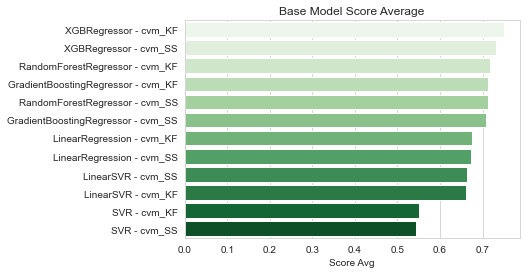

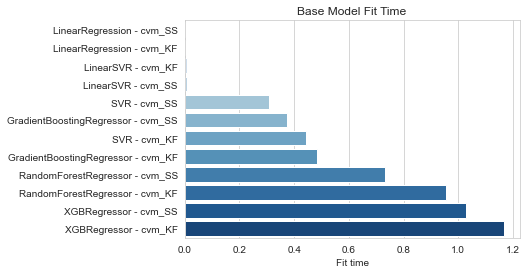

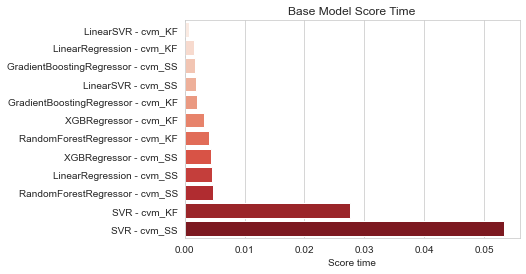

END OF BASE MODEL ANALYSIS.


In [51]:
def _classifiers():
    
    global classifiers
    
    # set random state
    rs = 1
    
    # Create a list of classifiers to be tested
    classifiers = []
    
    # assign which classifiers/algorithms are going to be tested
    classifiers.append(LinearRegression())
    classifiers.append(LinearSVR(random_state=rs))
    classifiers.append(SVR())
    classifiers.append(RandomForestRegressor(n_estimators=25, random_state=rs))
    classifiers.append(GradientBoostingRegressor())
    classifiers.append(XGBRegressor())
    
def _cv_methods():
    
    global cv_list
    
    # create list with cross validation methods
    cv_list = []
    
    # assign cross validation methods for use in analysis
    cv_list.append(KFold(n_splits=10))
    cv_list.append(ShuffleSplit(n_splits=10, test_size=0.2))

def _base_model_eval():
    
    print('\n\nSTEP1: Build simple models and cross validate ...')
    
    global cv_results
    global models_tbl
    global cv_method_tbl
    
    cv_results = []
    models_tbl = []
    cv_method_tbl = []
    
    # set variable for model count
    i = 1
    
    for cv_method in cv_list:
        for cls in classifiers:
            
            # perform cross validation
            scores = cross_validate(cls, X=X_train, y=y_train, cv=cv_method, n_jobs=-1)
            
            # assign variable for naming classifiers
            cls_ = str(cls).split('(')[0]
            
            print('\nModel NO. %s \nCV Method: %s \nClassifier: %s' % (i, str(cv_method).split('(')[0], cls_))
            for key in scores.keys():
                print('Model %s: %s' % (key, scores[key].mean()))

            models_tbl.append(cls_+' - cvm_'+''.join([c for c in str(str(cv_method).split('(')[0]) if c.isupper()]))
            cv_method_tbl.append(str(cv_method).split('(')[0])
            cv_results.append(scores)
                    
            # next model
            i+=1 

def _model_results():
    
    print('\n\n\nSTEP2: Model analysis...\n\n')
    
    global fit_time
    global score_time
    global test_score
    global result_tbl
    
    fit_time = []
    score_time = []
    test_score = []
    
    for n, item in enumerate(cv_results):
        for key in item:

            if key == 'fit_time':
                fit_time.append(item[key].mean())
            elif key == 'score_time':
                score_time.append(item[key].mean())
            else:
                test_score.append([np.mean(item[key]), np.std(item[key])])
                
    result_tbl = pd.DataFrame(data={'CV Method':cv_method_tbl, 'Score Avg':[row[0] for row in test_score],
                                    'Score Std':[row[1] for row in test_score], 'Fit time':fit_time, 'Score time':score_time},
                              index=models_tbl)
    
    print('TABLE IS SORTED BY `Score Avg`')
    display(result_tbl.sort_values(by='Score Avg', ascending=False))
    print('\n\n')
    
    sns.set_style('whitegrid')
    sns.barplot(x='Score Avg', y=result_tbl.sort_values(by='Score Avg', ascending=False).index,
                data=result_tbl.sort_values(by='Score Avg', ascending=False), palette='Greens')    
    plt.title('Base Model Score Average')
    plt.show()
    sns.barplot(x='Fit time', y=result_tbl.sort_values(by='Fit time').index, data=result_tbl.sort_values(by='Fit time'),
               palette='Blues')
    plt.title('Base Model Fit Time')
    plt.show()
    sns.barplot(x='Score time', y=result_tbl.sort_values(by='Score time').index, data=result_tbl.sort_values(by='Score time'),
               palette='Reds')
    plt.title('Base Model Score Time')
    plt.show()
    
def main():
    _classifiers()
    _cv_methods()
    _base_model_eval()
    _model_results()

if __name__ == "__main__":
    main()
    print('END OF BASE MODEL ANALYSIS.')

## Base Model Evaluation and Next Steps

#### General observations:
Score time can be considered negligable. For the cross validation methods, it seems that KFold produces more accurate models, but ShuffleSplit is faster. Based on these results, since the trade off is minimal in both diretions, we will proceed with `KFold` cross validation method only.

Alongside these observations, it can be seen that the `XGBRegressor` is our most accurate classifier, yet slowest (as expected). The fastest performing model is built with the `LinearRegression` classifier, with an average-of-the-pack score. The worst performing classifier was the Support Vector Regression (`SVR`) method.

#### Next steps:
Moving forward, we will perform some ensamble algorithm approaches with the following classifiers:

`XGBRegressor` `GradientBoostingRegressor` `RandomForestRegressor` `LinearRegression`

Each of these will be paired with the `AdaBoostRegressor` and `BaggingRegressor`.



STEP1: Build ensamble models and cross validate ...

Model NO. 1 
Classifier: GradientBoostingRegressor
Model fit_time: 0.39838595390319825
Model score_time: 0.0014882087707519531
Model test_score: 0.7137466400135873

Model NO. 2 
Classifier: XGBRegressor
Model fit_time: 1.103944683074951
Model score_time: 0.0027776002883911134
Model test_score: 0.7494290653941821

Model NO. 3 
Classifier: AdaBoostRegressor with RandomForestRegressor
Model fit_time: 13.863321661949158
Model score_time: 0.0645296812057495
Model test_score: 0.7657226618178156

Model NO. 4 
Classifier: AdaBoostRegressor with LinearRegression
Model fit_time: 0.05847797393798828
Model score_time: 0.0018850326538085937
Model test_score: 0.6586720216507789

Model NO. 5 
Classifier: AdaBoostRegressor with XGBRegressor
Model fit_time: 51.07738523483276
Model score_time: 0.08913381099700927
Model test_score: 0.79302454916684

Model NO. 6 
Classifier: AdaBoostRegressor with GradientBoostingRegressor
Model fit_time: 18.340309095

,CV Method,Score Avg,Score Std,Fit time,Score time
AdaBoostRegressor with XGBRegressor,KFold,0.793025,0.023651,51.077385,0.089134
AdaBoostRegressor with RandomForestRegressor,KFold,0.765723,0.022708,13.863322,0.064530
BaggingRegressor with XGBRegressor,KFold,0.761398,0.030733,10.646123,0.019344
XGBRegressor,KFold,0.749429,0.033607,1.103945,0.002778
AdaBoostRegressor with GradientBoostingRegressor,KFold,0.736699,0.029813,18.340309,0.030752
GradientBoostingRegressor,KFold,0.713747,0.024360,0.398386,0.001488
BaggingRegressor with GradientBoostingRegressor,KFold,0.712972,0.023846,3.601399,0.006845
BaggingRegressor with RandomForestRegressor,KFold,0.709220,0.028520,2.009983,0.013243
BaggingRegressor with LinearRegression,KFold,0.674257,0.025897,0.060363,0.002182
AdaBoostRegressor with LinearRegression,KFold,0.658672,0.031711,0.058478,0.001885


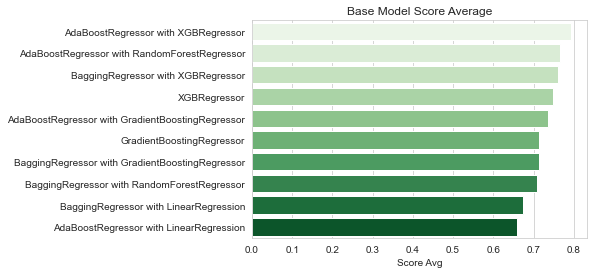

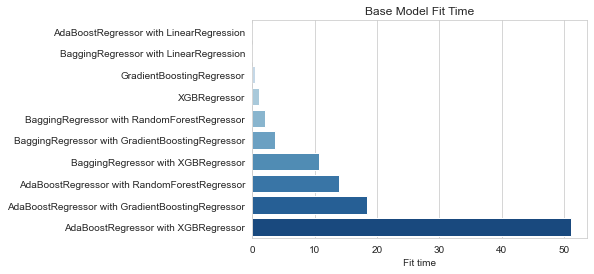

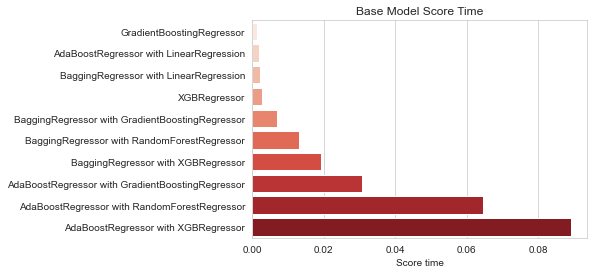

END OF ENSAMBLE MODEL ANALYSIS.


In [52]:
def _classifiers():
    
    global classifiers
    
    # Create a list of classifiers to be tested
    classifiers = []
    
    # assign which classifiers/algorithms are going to be tested
    classifiers.append(GradientBoostingRegressor())
    classifiers.append(XGBRegressor())
    
    # Boosting
    classifiers.append(AdaBoostRegressor(RandomForestRegressor(n_estimators=10)))
    classifiers.append(AdaBoostRegressor(LinearRegression()))
    classifiers.append(AdaBoostRegressor(XGBRegressor()))
    classifiers.append(AdaBoostRegressor(GradientBoostingRegressor()))
                       
    # Bagging
    classifiers.append(BaggingRegressor(RandomForestRegressor(n_estimators=10)))
    classifiers.append(BaggingRegressor(LinearRegression()))
    classifiers.append(BaggingRegressor(XGBRegressor()))
    classifiers.append(BaggingRegressor(GradientBoostingRegressor()))

def _ensamble_model_eval():
    
    print('\n\nSTEP1: Build ensamble models and cross validate ...')
    
    global cv_results
    global models_tbl
    global cv_method_tbl
    
    cv_results = []
    models_tbl = []
    cv_method_tbl = []
    
    # set variable for model count
    i = 1
    
    # assign cross validation method
    kf = KFold(n_splits=10)
    
    for cls in classifiers:

        # perform cross validation
        scores = cross_validate(cls, X=X_train, y=y_train, cv=kf, n_jobs=-1)

        # assign variable for naming classifiers
        cls_ = str(cls).split('(')[0]

        # assigning variable to be checked for ensambled methods
        ens_cls = str(cls)
        cls_lower = ens_cls.lower()

        # Checking whether there is a base_estimator inside an ensambled classifier
        if 'base_estimator' in cls_lower:

            cls_ = '%s with %s' % (cls_, str(cls).split('(')[1].split('=')[1])
            print('\nModel NO. %s \nClassifier: %s' % (i,cls_))

            for key in scores.keys():
                print('Model %s: %s' % (key, scores[key].mean()))

            models_tbl.append(cls_)
            cv_method_tbl.append(str(kf).split('(')[0])
            cv_results.append(scores)

        else:
            print('\nModel NO. %s \nClassifier: %s' % (i, cls_))
            for key in scores.keys():
                print('Model %s: %s' % (key, scores[key].mean()))

            models_tbl.append(cls_)
            cv_method_tbl.append(str(kf).split('(')[0])
            cv_results.append(scores)

        # next model
        i+=1 
    
def main():
    _classifiers()
    _ensamble_model_eval()
    _model_results()

if __name__ == "__main__":
    main()
    print('END OF ENSAMBLE MODEL ANALYSIS.')

### Ensamble Model Evaluation and Next Steps
#### General observations:
The `AdaBoostRegressor with XGBRegressor` performed the best, but at a heavy cost of time to fit the model. The next two highest scored models were `AdaBoostRegressor with RFR` and `BaggingRegressor with XGBRegressor`, with model fit times of roughly 14s and 11s, respectively.

Both `XGBRegressor` and `GradientBoostingRegressor` are still good models that are very efficient in comparison to the above mentioned ensamble models.

#### Next steps:
Next we will perform hyper parameter tuning for the following models:

`XGBRegressor`, `GradientBoostingRegressor`, `BaggingRegressor with XGBRegressor`, and `AdaBoostRegressor with RFR`

# Previous parameters would have taken multiple days to run. Adjust parameters will be used.

In [56]:
def _param_grids():
    
    global model_params
    
    # create an empty dictionary that will store the parameter grids for each model
    model_params = dict()
    
    # parameters for XGBRegressor
    # previous total of 10, now 5
    xgb_n_est = [int(x) for x in np.linspace(100, 1000, 5)]
    # previous list [0.001, 0.01, 0.1, 0.3, 0.5, 1]
    xgb_learn_rate = [0.001, 0.01, 0.1, 1]
    # previous list [0.001, 0.01, 0.1, 0.25, 0.5, 0.75]
    min_child_weight = [0.001, 0.01, 0.1, 0.5]
    # tree_meth = 'gpu_hist' - not working, bringing up error saying that this parameter doesn't accept strings?
    # previously step of 2
    xgb_max_dpt = np.arange(2, 10, 4)
    # previous list [0, 0.5, 1, 3, 5, 10]
    gamma = [0, 1, 5, 10]
    # previous list [0.1, 0.3, 0.5, 0.7, 0.9, 1]
    xgb_subsample = [0.1, 0.5, 0.9]
    colsamp_bytree = np.arange(0.1, 1, 0.2)
    
    xgb_params = {'n_estimators':xgb_n_est, 'learning_rate':xgb_learn_rate, 'max_depth':xgb_max_dpt, 'min_child_weight':min_child_weight,
                  'gamma': gamma,'subsample':xgb_subsample,'colsample_bytree':colsamp_bytree
                 }
    
    # parameters for GradientBoostingRegressor
    # we will reuse some of the parameters for XGBRegressor
    gbm_loss = ['ls', 'lad', 'quantile']
    min_samp_split = [2, 4, 6, 10]
    min_samp_leaf = [1, 2, 3, 4, 5]
    gbm_max_feats = ['auto','sqrt']
    
    GBR_params = {'loss':gbm_loss, 'n_estimators':xgb_n_est, 'learning_rate':xgb_learn_rate, 'max_depth':xgb_max_dpt,
                  'subsample':xgb_subsample,'min_samples_split':min_samp_split, 'min_samples_leaf':min_samp_leaf,
                  'max_features':gbm_max_feats
                 }
    
    # parameters for AdaBoostRegressor with RandomForestRegressor
    # parameters for RandomForestRegressor
    be_criter = ['mse','mae']
    be_n_est = [int(x) for x in np.linspace(100, 1000, 10)]
    be_maxfeats = ['auto','sqrt']
    be_maxdpt = [int(x) for x in np.linspace(10, 100, 5)]
    be_maxdpt.append(None)
    be_minsampleaf = [1, 3, 5]
    be_bs = [True, False]
    
    # parameters for AdaBoostRegressor
    abr_n_est = [10,50,100,150,200,500,1000]
    abr_learn_rate = [10, 1, 0.1, 0.01, 0.001]
    abr_loss = ['linear','square','exponential']
    
    ABR_RFR = {'base_estimator__criterion':be_criter, 'base_estimator__n_estimators':be_n_est,
               'base_estimator__max_features':be_maxfeats,'base_estimator__max_depth':be_maxdpt,
               'base_estimator__min_samples_leaf':be_minsampleaf, 'base_estimator__bootstrap':be_bs,'n_estimators':abr_n_est,
               'learning_rate':abr_learn_rate, 'loss':abr_loss
              }
    
    # parameters for BaggingRegressor with XGBRegressor
    bag_n_est = [5, 10, 20, 50, 100, 200, 500, 1000]
    max_samps = [1, 3, 5, 7, 10, 20]
    bag_max_feats = ['auto','sqrt']
    bag_bs = [True, False]
    bag_bs_feats = [True, False]
    n_jobs=-1
    
    BR_XGBR = {'base_estimator__learning_rate':xgb_learn_rate, 'base_estimator__n_estimators':xgb_n_est,
               'base_estimator__min_child_weight':min_child_weight,'base_estimator__max_depth':xgb_max_dpt,
               'base_estimator__gamma': gamma,'base_estimator__subsample':xgb_subsample,
               'base_estimator__colsample_bytree':colsamp_bytree,'n_estimators':bag_n_est,'max_samples':max_samps,
               'max_features':bag_max_feats, 'bootstrap':bag_bs,'bootstrap_features':bag_bs_feats
              } 
    
    model_params['XGBR'] = xgb_params
    model_params['GBR'] = GBR_params
    model_params['ABR_RFR'] = ABR_RFR
    model_params['BR_XGBR'] = BR_XGBR
    
def _classifiers():
    
    global classifiers
    
    # Create a list of classifiers to be tested
    classifiers = []
    
    # assign which classifiers/algorithms are going to be tested
    #classifiers.append(GradientBoostingRegressor())
    classifiers.append(XGBRegressor())
    #classifiers.append(AdaBoostRegressor(RandomForestRegressor()))
    #classifiers.append(BaggingRegressor(XGBRegressor()))
    
def _gridsearchcv():
    
    global model_used
    global best_scores
    global best_params
    global cv_results
    
    print('\n\nSTEP 1: Generate GridSearchCV for all classifiers...')
    
    # create lists to save best scores and parameters
    model_used = []
    best_scores = []
    best_params = []
    cv_results = []
    
    for cls in classifiers:
        for grid in model_params.keys():
            
            # assign variable for naming classifiers
            cls_ = str(cls).split('(')[0]
            
            # comparitive method to grab the correct parameter grid from 'model_params' dict
            mod_abv = ''.join([c for c in [str(x).split('(')[0] for x in str(cls_)] if c.isupper()])
            
            if mod_abv in grid and mod_abv[0] == grid[0]:
                print(f'\nTraining model: {mod_abv} - grid {grid}')
                gscv = GridSearchCV(cls, param_grid=model_params[grid], scoring='explained_variance', verbose=5, n_jobs=-1)
                gscv.fit(X_train, y_train)
                print(f'\nBest score: {gscv.best_score_}')
                print(f'Best parameters: {gscv.best_params_}')
                model_used.append(grid)
                best_scores.append(gscv.best_score_)
                best_params.append(gscv.best_params_)
                cv_results.append(gscv.cv_results_)

def _randomizedsearchcv():
    global model_used
    global best_scores
    global best_params
    global cv_results
    
    print('\n\nSTEP 1: Generate RandomizedSearchCV for all classifiers...')
    
    # create lists to save best scores and parameters
    model_used = []
    best_scores = []
    best_params = []
    cv_results = []
    
    # set parameters for RandomizedSearchCV
    folds = 5
    param_iter = 10
    
    kf = KFold(n_splits=folds)
    
    for cls in classifiers:
        for grid in model_params.keys():
            
            # assign variable for naming classifiers
            cls_ = str(cls).split('(')[0]
            
            # comparitive method to grab the correct parameter grid from 'model_params' dict
            mod_abv = ''.join([c for c in [str(x).split('(')[0] for x in str(cls_)] if c.isupper()])
            
            if mod_abv in grid and mod_abv[0] == grid[0]:
                print(f'\nTraining model: {mod_abv} - grid {grid}')
                rscv = RandomizedSearchCV(cls, param_distributions=model_params[grid], n_iter=param_iter, 
                                          scoring='explained_variance', verbose=5, cv=kf, n_jobs=-1)
                rscv.fit(X_train, y_train)
                print(f'\nBest score: {rscv.best_score_}')
                print(f'Best parameters: {rscv.best_params_}')
                model_used.append(grid)
                best_scores.append(rscv.best_score_)
                best_params.append(rscv.best_params_)
                cv_results.append(rscv.cv_results_)
                
def main():
    _param_grids()
    _classifiers()
    grid_type = input("Select an option and press enter:\n\n'1' for GridSearchCV (likely more accurate, but will take longer!)\n'2' for \
RandomizedSearchCV (much shorter, but potentially less accurate)\nInput: ")
    if grid_type == '1':
        _gridsearchcv()
    elif grid_type == '2':
        _randomizedsearchcv()
    else:
        print('\nNot a valid input. Please re-run script to execute hyperparameter tuning.')
    
if __name__ == '__main__':
    main()
    print('End of hyperparameter tuning.')

Select an option and press enter:

'1' for GridSearchCV (likely more accurate, but will take longer!)
'2' for RandomizedSearchCV (much shorter, but potentially less accurate)
Input: 1


STEP 1: Generate GridSearchCV for all classifiers...

Training model: XGBR - grid XGBR
Fitting 3 folds for each of 9600 candidates, totalling 28800 fits


C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 894 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1164 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1812 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2190 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2604 tasks      | 


Best score: 0.7676967699867098
Best parameters: {'colsample_bytree': 0.9000000000000001, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 0.001, 'n_estimators': 1000, 'subsample': 0.9}
End of hyperparameter tuning.


In [59]:
# create a function that runs through multiple iterations of the RandomizedSearchCV and grabs the best coefficients from that...
main()

Select an option and press enter:

'1' for GridSearchCV (likely more accurate, but will take longer!)
'2' for RandomizedSearchCV (much shorter, but potentially less accurate)
Input: 2


STEP 1: Generate RandomizedSearchCV for all classifiers...

Training model: XGBR - grid XGBR
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    8.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.9s finished



Best score: 0.7736038007762207
Best parameters: {'subsample': 0.5, 'n_estimators': 325, 'min_child_weight': 0.001, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.9000000000000001}


## Tips for creating model

time, and accuracy
conclusion should look at the difference in these value between models.
Train time, test time, accuracy.
Ensamble algorithms. (bagging (random forest) and boosting (chained algorithms) algorithms) - bagging is Preets favorite.
Want the model to be robust, not too sensitive.
XGboost algorithm is good for ensamble...

improving the models...
scaling, normalizing, standardizing data.
tune the parameters.
categorize vs. dummies

Scoring

mean absolute error

mean squared error

r^2 or explained variance